# 🔐 Hiding Encrypted Text in RGB Images Using XOR and ASCII Encoding

**Author:** *Arsh*  

---
### 📘 Description

This notebook demonstrates a method for hiding secret text inside RGB images using pixel-level XOR-based encryption.  
The message is first converted to ASCII, XOR'd with a key, and embedded into the image.  
The same key is used to extract and decrypt the message later.

---

# Step 1: Import Required Libraries

In [2]:
#import library
import cv2 #opencv image
import numpy as np #array 
import string
import os
import matplotlib.pyplot as plt

## 🔤 Step 2: Setup ASCII Mappings

We create two dictionaries:
- `char_to_ascii`: Maps characters to ASCII
- `ascii_to_char`: Maps ASCII values back to characters

In [3]:
#ASCII CONVERSION
d={chr(i):i for i in range(255)}  #character to ascii  
c={i:chr(i) for i in range(255)}  #ascii to caharacter

## 🖼️ Step 3: Load and Display the Original Image

We load an RGB image using OpenCV and convert it from BGR to RGB for proper display.

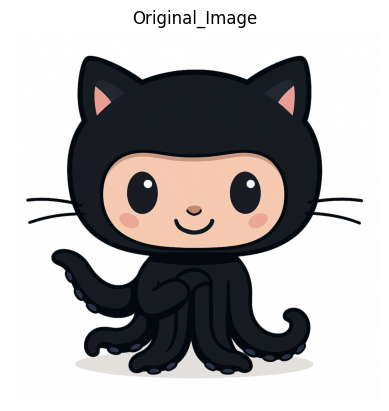

In [4]:
#Load the image
image_path=r"assets\original.png"
x=cv2.imread(image_path)
xrgb=cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
plt.imshow(xrgb)
plt.title("Original_Image")
plt.axis('off')
plt.show()


In [5]:
x.shape

(1024, 1024, 3)

## 🗝️ Step 4: Define Secret Text and Key

The message and key are converted to their ASCII equivalents before encryption.

In [6]:
key="123"
text="secret"

## Convert to ASCII

In [7]:
# ASCII Values
text_ascii=[d[ch] for ch in text]  #list of ascii values of text characters
key_ascii=[d[ch] for ch in key]    #list of ascii values of key
print(text_ascii)
print(key_ascii)

[115, 101, 99, 114, 101, 116]
[49, 50, 51]


## 🧪 Step 5: Encrypt and Embed the Message in the Image

Each character from the secret text is XOR-encrypted using the key.  
The result is stored in the RGB pixel values of the image.

In [8]:
#encrypt using pixel modelfication
x_enc=x.copy()
n=0  #number of rows
m=0  #number of coloumns
z=0  #colour panel
l=len(text)
kl=0
for i in range(l):
    orig_val=x_enc[n,m,z]
    new_val=d[text[i]]^d[key[kl]]  #important
    x_enc[n,m,z]=new_val
    print(f"Embedding '{text[i]}' (ASCII {d[text[i]]}) XOR '{key[kl]}' (ASCII {d[key[kl]]}) = {new_val} at pixel ({n},{m},{z}) [original={orig_val}]")
    n=n+1
    m=m+1
    m=(m+1)%3
    z=(z+1)%3
    kl=(kl+1)%len(key)
    

Embedding 's' (ASCII 115) XOR '1' (ASCII 49) = 66 at pixel (0,0,0) [original=254]
Embedding 'e' (ASCII 101) XOR '2' (ASCII 50) = 87 at pixel (1,2,1) [original=255]
Embedding 'c' (ASCII 99) XOR '3' (ASCII 51) = 80 at pixel (2,1,2) [original=253]
Embedding 'r' (ASCII 114) XOR '1' (ASCII 49) = 67 at pixel (3,0,0) [original=255]
Embedding 'e' (ASCII 101) XOR '2' (ASCII 50) = 87 at pixel (4,2,1) [original=254]
Embedding 't' (ASCII 116) XOR '3' (ASCII 51) = 71 at pixel (5,1,2) [original=255]


In [9]:
cv2.imwrite("encrypt.jpg",x_enc)

True

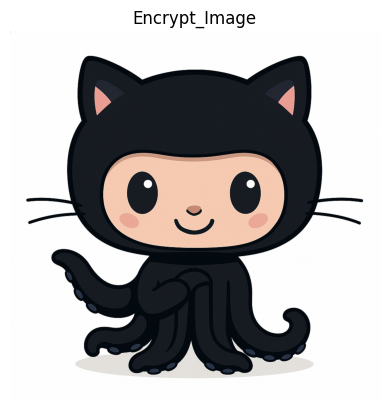

In [10]:
plt.imshow(cv2.cvtColor(x_enc,cv2.COLOR_BGR2RGB))
plt.title("Encrypt_Image")
plt.axis('off')
plt.show()

## 🖼️ Save the Encrypted Image as a PNG or JPG

After embedding the encrypted message into the image, save it using OpenCV:

In [13]:
# Save the encrypted image as a PNG or JPG
image_path=r"assets\encrypted_output.png"
cv2.imwrite(image_path, x_enc)

True

## 🔓 Step 6: Decrypt the Message from Image

The same key is used to XOR the pixel values and retrieve the original text.

In [12]:
#Decrypt
n,m,z=0,0,0
kl=0
decrypt=""
for i in range(l):
    val=x_enc[n,m,z]
    orig_char=c[val^d[key[kl]]]
    decrypt=decrypt+orig_char

    print(f"Decrypting pixel ({n},{m},{z}): {val} XOR {d[key[kl]]} = {val ^ d[key[kl]]} -> '{orig_char}'")

    n=n+1
    m=m+1
    m=(m+1)%3
    z=(z+1)%3
    kl=(kl+1)%len(key)
print(decrypt)
    

Decrypting pixel (0,0,0): 66 XOR 49 = 115 -> 's'
Decrypting pixel (1,2,1): 87 XOR 50 = 101 -> 'e'
Decrypting pixel (2,1,2): 80 XOR 51 = 99 -> 'c'
Decrypting pixel (3,0,0): 67 XOR 49 = 114 -> 'r'
Decrypting pixel (4,2,1): 87 XOR 50 = 101 -> 'e'
Decrypting pixel (5,1,2): 71 XOR 51 = 116 -> 't'
secret
